# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Initialize empty lists for the building of the dataframe
city_names = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [4]:
# Build for loop to retrieve data for each city in the cities list
record = 1
set_number = 1
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    # Build query URL and request results in Fahrenheit
    query = city
    units = "imperial"
    # Retrieve the weather data from the URL
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    parameters = f"appid={api_key}&q={query}&units={units}"
    url = base_url + parameters 
    response = requests.get(url).json()
    # If the response is not 200, skip the current data entry
    if response["cod"] != 200: 
        print("City not found. Skipping...")
        pass
    # Otherwise, append the empty lists with their corresponding data attributes
    else: 
        city_names.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {record} of Set {set_number} | {city}")
        record += 1
        # Create a time sleep to avoid API overrunning limit
        if record == 50:
            time.sleep(3)
            record = 1
            set_number += 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | konyshevka
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | majene
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | warrington
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | linjiang
Processing Record 9 of Set 1 | wamba
Processing Record 10 of Set 1 | alofi
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | klaksvik
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | bonavista
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | iki-burul
City not found. Skipping...
Processing Record 18 of Set 1 | goderich
Processing Record 19 of Set 1 | grand gaube
Processing Record 20 of Set 1 | tecpan
Processing Record 21 of Set 1 | maiduguri
City not found. Skipping...
Processing Record 22 of Set 1 | alta floresta
Proc

Processing Record 40 of Set 4 | berlevag
Processing Record 41 of Set 4 | san patricio
Processing Record 42 of Set 4 | high level
Processing Record 43 of Set 4 | ciudad bolivar
Processing Record 44 of Set 4 | duncan
Processing Record 45 of Set 4 | palu
Processing Record 46 of Set 4 | tuy hoa
Processing Record 47 of Set 4 | cherskiy
Processing Record 48 of Set 4 | kamenka
Processing Record 49 of Set 4 | dubbo
Processing Record 1 of Set 5 | shenjiamen
Processing Record 2 of Set 5 | caruray
Processing Record 3 of Set 5 | kalmunai
City not found. Skipping...
Processing Record 4 of Set 5 | koutiala
Processing Record 5 of Set 5 | gardanne
Processing Record 6 of Set 5 | la ronge
Processing Record 7 of Set 5 | lorengau
Processing Record 8 of Set 5 | skibotn
Processing Record 9 of Set 5 | chanthaburi
Processing Record 10 of Set 5 | odweyne
Processing Record 11 of Set 5 | sept-iles
Processing Record 12 of Set 5 | aksu
City not found. Skipping...
Processing Record 13 of Set 5 | tenenkou
Processing

Processing Record 32 of Set 8 | amposta
Processing Record 33 of Set 8 | nizhniy kuranakh
Processing Record 34 of Set 8 | tual
City not found. Skipping...
Processing Record 35 of Set 8 | tacuta
Processing Record 36 of Set 8 | kuala pilah
Processing Record 37 of Set 8 | rocha
Processing Record 38 of Set 8 | beipiao
Processing Record 39 of Set 8 | chimbote
Processing Record 40 of Set 8 | fortuna
Processing Record 41 of Set 8 | dingle
Processing Record 42 of Set 8 | orsk
Processing Record 43 of Set 8 | steamboat springs
Processing Record 44 of Set 8 | port-gentil
Processing Record 45 of Set 8 | belogorsk
Processing Record 46 of Set 8 | sabancuy
Processing Record 47 of Set 8 | batouri
Processing Record 48 of Set 8 | diebougou
Processing Record 49 of Set 8 | santarem
Processing Record 1 of Set 9 | palembang
Processing Record 2 of Set 9 | valley city
Processing Record 3 of Set 9 | huarmey
Processing Record 4 of Set 9 | moron
Processing Record 5 of Set 9 | hillsboro
Processing Record 6 of Set 

Processing Record 25 of Set 12 | languyan
Processing Record 26 of Set 12 | namwala
Processing Record 27 of Set 12 | vao
Processing Record 28 of Set 12 | tupancireta
Processing Record 29 of Set 12 | pangnirtung
Processing Record 30 of Set 12 | marion
Processing Record 31 of Set 12 | matay
Processing Record 32 of Set 12 | labuhan


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create the data frame for the weather data
raw_data = pd.DataFrame({
    "City" : pd.Series(city_names),
    "Cloudiness" : pd.Series(cloudiness),
    "Country" : pd.Series(country),
    "Date" : pd.Series(date),
    "Humidity" : pd.Series(humidity),
    "Lat" : pd.Series(lat),
    "Lng" : pd.Series(lng),
    "Max Temp" : pd.Series(max_temp),
    "Wind Speed" : pd.Series(wind_speed)
})

In [6]:
# remove rows containing incomplete or Not a Number data entries
city_data = raw_data.dropna(how= "any")
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Konyshevka,90,RU,1604813445,87,51.84,35.29,46.40,11.18
1,Hermanus,82,ZA,1604813445,92,-34.42,19.23,57.00,1.99
2,Hilo,90,US,1604813431,88,19.73,-155.09,73.40,8.05
3,Majene,7,ID,1604813446,56,-3.54,118.97,88.59,7.45
4,Albany,40,US,1604813441,100,42.60,-73.97,50.00,3.00


In [7]:
# display the count of each data entry attribute
city_data.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [8]:
# Retrieve the data into an output csv file
city_data.to_csv(output_data_file)

In [9]:
# Summarize the weather data to check if there is any data which its humidity value is over 100%
city_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,571.000000,5.710000e+02,571.000000,571.000000,571.000000,571.000000,571.000000
mean,47.323993,1.604814e+09,71.765324,21.069930,14.559527,58.707618,8.504904
std,38.819986,7.859816e+01,20.338821,32.422252,89.520761,22.067171,6.079043
min,0.000000,1.604813e+09,1.000000,-54.800000,-175.200000,-26.630000,0.220000
25%,2.000000,1.604813e+09,61.000000,-2.620000,-65.235000,44.355000,4.305000
50%,47.000000,1.604814e+09,76.000000,25.330000,20.270000,63.000000,6.930000
75%,89.000000,1.604814e+09,87.000000,46.730000,92.690000,76.930000,11.520000
max,100.000000,1.604814e+09,100.000000,78.220000,178.420000,96.800000,40.020000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

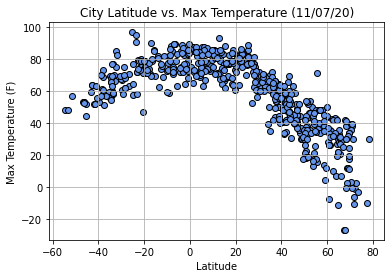

In [41]:
# Plot the scattered plot between the relationships of city latitude and max tempurature
plt.scatter(city_data["Lat"], city_data["Max Temp"], edgecolor = "black", facecolor = "cornflowerblue")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (11/07/20)")
plt.grid()
plt.savefig("output_data/City_Latitude_vs_Max_Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

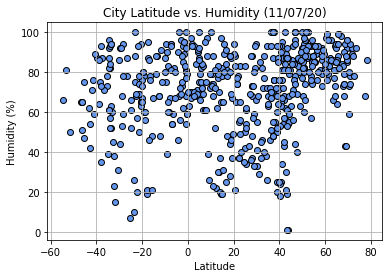

In [42]:
# Plot the scattered plot between the relationships of city latitude and humidity
plt.scatter(city_data["Lat"], city_data["Humidity"], edgecolor = "black", facecolor = "cornflowerblue")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (11/07/20)")
plt.grid()
plt.savefig("output_data/City_Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

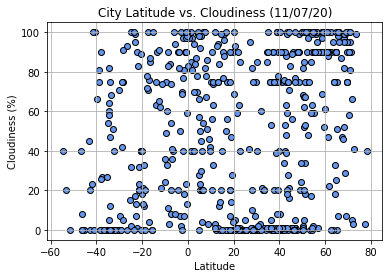

In [43]:
# Plot the scattered plot between the relationships of city latitude and Cloudiness
plt.scatter(city_data["Lat"], city_data["Cloudiness"], edgecolor = "black", facecolor = "cornflowerblue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (11/07/20)")
plt.grid()
plt.savefig("output_data/City_Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

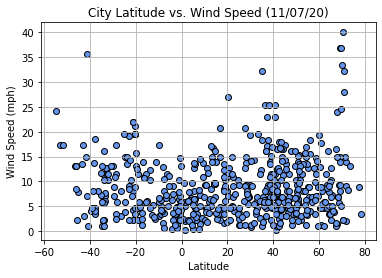

In [44]:
# Plot the scattered plot between the relationships of city latitude and wind speed
plt.scatter(city_data["Lat"], city_data["Wind Speed"], edgecolor = "black", facecolor = "cornflowerblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (11/07/20)")
plt.grid()
plt.savefig("output_data/City_Latitude_vs_Wind_Speed.png")
plt.show()

## Linear Regression

In [45]:
# Split the city data to Northern and Southern Hemisphere
northern = city_data[city_data["Lat"] >= 0]
southern = city_data[city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [46]:
# Compute the regression and correlation coefficient between city latitude and max tempurature of Northern Hemisphere
regression1 = sts.linregress(northern["Lat"], northern["Max Temp"])
regression_line1 = regression1[0] * (northern["Lat"]) + regression1[1]
r_value1 = sts.pearsonr(northern["Lat"], northern["Max Temp"])[0]

The r-value is: -0.8674568777644297


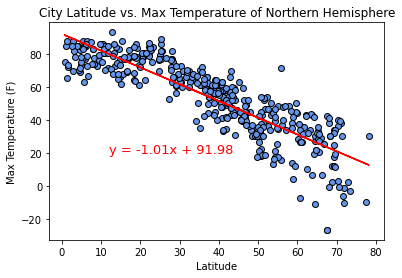

In [47]:
# Plot the scattered plot and the regression line between city latitude and max tempurature of Northern Hemisphere
print(f"The r-value is: {r_value1}")
plt.scatter(northern["Lat"], northern["Max Temp"], edgecolor = "black", facecolor = "cornflowerblue")
plt.plot(northern["Lat"], regression_line1, color = "red")
plt.annotate("y = " + str(round(regression1[0],2)) + "x + " + str(round(regression1[1],2)), (12,20), size = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature of Northern Hemisphere")
plt.savefig("output_data/City_Latitude_vs_Max_Temperature_of_Northern_Hemisphere.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [48]:
# compute the regression and correlation coefficient between city latitude and max tempurature of Southern Hemisphere
regression2 = sts.linregress(southern["Lat"], southern["Max Temp"])
regression_line2 = regression2[0] * (southern["Lat"]) + regression2[1]
r_value2 = sts.pearsonr(southern["Lat"], southern["Max Temp"])[0]

The r-value is: 0.6782093477653269


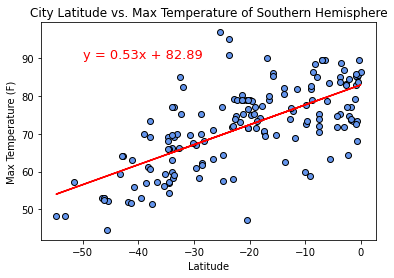

In [49]:
# plot the scattered plot and the regression line between city latitude and max tempurature of Southern Hemisphere
print(f"The r-value is: {r_value2}")
plt.scatter(southern["Lat"], southern["Max Temp"], edgecolor = "black", facecolor = "cornflowerblue")
plt.plot(southern["Lat"], regression_line2, color = "red")
plt.annotate("y = " + str(round(regression2[0],2)) + "x + " + str(round(regression2[1],2)), (-50,90), size = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature of Southern Hemisphere")
plt.savefig("output_data/City_Latitude_vs_Max_Temperature_of_Southern_Hemisphere.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [50]:
# Compute the regression line and correlation coefficient between city latitude and humidity of Northern Hemisphere
regression3 = sts.linregress(northern["Lat"], northern["Humidity"])
regression_line3 = regression3[0] * (northern["Lat"]) + regression3[1]
r_value3 = sts.pearsonr(northern["Lat"], northern["Humidity"])[0]

The r-value is: 0.25742929211444426


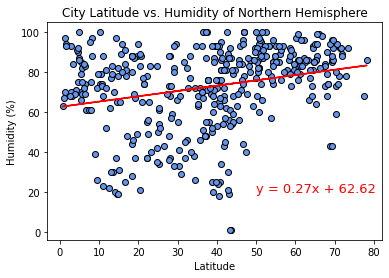

In [51]:
# plot the scattered plot and the regression line between city latitude and humidity of Northern Hemisphere
print(f"The r-value is: {r_value3}")
plt.scatter(northern["Lat"], northern["Humidity"], edgecolor = "black", facecolor = "cornflowerblue")
plt.plot(northern["Lat"], regression_line3, color = "red")
plt.annotate("y = " + str(round(regression3[0],2)) + "x + " + str(round(regression3[1],2)), (50,20), size = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity of Northern Hemisphere")
plt.savefig("output_data/City_Latitude_vs_Humdidity_of_Northern_Hemisphere.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [52]:
# Compute the regression line and correlation coefficient between city latitude and humidity of Southern Hemisphere
regression4 = sts.linregress(southern["Lat"], southern["Humidity"])
regression_line4 = regression4[0] * (southern["Lat"]) + regression4[1]
r_value4 = sts.pearsonr(southern["Lat"], southern["Humidity"])[0]

The r-value is: 0.1821009818484091


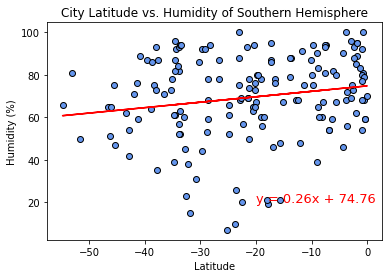

In [53]:
# plot the scattered plot and the regression line between city latitude and humidity of Southern Hemisphere
print(f"The r-value is: {r_value4}")
plt.scatter(southern["Lat"], southern["Humidity"], edgecolor = "black", facecolor = "cornflowerblue")
plt.plot(southern["Lat"], regression_line4, color = "red")
plt.annotate("y = " + str(round(regression4[0],2)) + "x + " + str(round(regression4[1],2)), (-20,20), size = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity of Southern Hemisphere")
plt.savefig("output_data/City_Latitude_vs_Humidity_of_Southern_Hemisphere.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [54]:
# Compute the regression line and correlation coefficient between city latitude and cloudiness of Northern Hemisphere
regression5 = sts.linregress(northern["Lat"], northern["Cloudiness"])
regression_line5 = regression5[0] * (northern["Lat"]) + regression5[1]
r_value5 = sts.pearsonr(northern["Lat"], northern["Cloudiness"])[0]

The r-value is: 0.18414742413091884


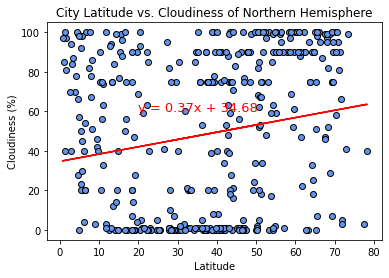

In [55]:
# plot the scattered plot and the regression line between city latitude and cloudiness of Northern Hemisphere
print(f"The r-value is: {r_value5}")
plt.scatter(northern["Lat"], northern["Cloudiness"], edgecolor = "black", facecolor = "cornflowerblue")
plt.plot(northern["Lat"], regression_line5, color = "red")
plt.annotate("y = " + str(round(regression5[0],2)) + "x + " + str(round(regression5[1],2)), (20,60), size = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness of Northern Hemisphere")
plt.savefig("output_data/City_Latitude_vs_Cloudiness_of_Northern_Hemisphere.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [56]:
# Compute the regression line and correlation coefficient between city latitude and cloudiness of Southern Hemisphere
regression6 = sts.linregress(southern["Lat"], southern["Cloudiness"])
regression_line6 = regression6[0] * (southern["Lat"]) + regression6[1]
r_value6 = sts.pearsonr(southern["Lat"], southern["Cloudiness"])[0]

The r-value is: 0.3490494175551389


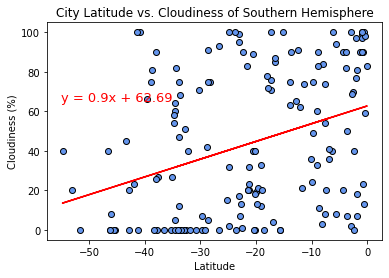

In [57]:
# plot the scattered plot and the regression line between city latitude and cloudiness of Southern Hemisphere
print(f"The r-value is: {r_value6}")
plt.scatter(southern["Lat"], southern["Cloudiness"], edgecolor = "black", facecolor = "cornflowerblue")
plt.plot(southern["Lat"], regression_line6, color = "red")
plt.annotate("y = " + str(round(regression6[0],2)) + "x + " + str(round(regression6[1],2)), (-55,65), size = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness of Southern Hemisphere")
plt.savefig("output_data/City_Latitude_vs_Cloudiness_of_Southern_Hemisphere.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [58]:
# Compute the regression line and correlation coefficient between city latitude and wind speed of Northern Hemisphere
regression7 = sts.linregress(northern["Lat"], northern["Wind Speed"])
regression_line7 = regression7[0] * (northern["Lat"]) + regression7[1]
r_value7 = sts.pearsonr(northern["Lat"], northern["Wind Speed"])[0]

The r-value is: 0.19611170108887974


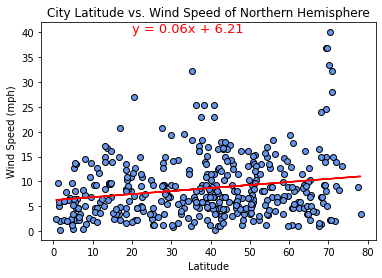

In [59]:
# plot the scattered plot and the regression line between city latitude and wind speed of Northern Hemisphere
print(f"The r-value is: {r_value7}")
plt.scatter(northern["Lat"], northern["Wind Speed"], edgecolor = "black", facecolor = "cornflowerblue")
plt.plot(northern["Lat"], regression_line7, color = "red")
plt.annotate("y = " + str(round(regression7[0],2)) + "x + " + str(round(regression7[1],2)), (20,40), size = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed of Northern Hemisphere")
plt.savefig("output_data/City_Latitude_vs_Wind_Speed_of_Northern_Hemisphere.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [60]:
# Compute the regression line and correlation coefficient between city latitude and wind speed of southern Hemisphere
regression8 = sts.linregress(southern["Lat"], southern["Wind Speed"])
regression_line8 = regression8[0] * (southern["Lat"]) + regression8[1]
r_value8 = sts.pearsonr(southern["Lat"], southern["Wind Speed"])[0]

The r-value is: -0.31546265436777365


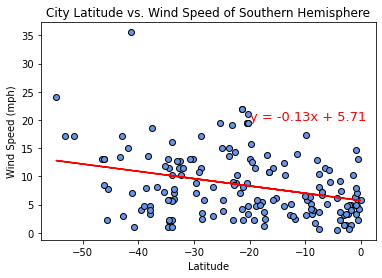

In [61]:
# plot the scattered plot and the regression line between city latitude and wind speed of Southern Hemisphere
print(f"The r-value is: {r_value8}")
plt.scatter(southern["Lat"], southern["Wind Speed"], edgecolor = "black", facecolor = "cornflowerblue")
plt.plot(southern["Lat"], regression_line8, color = "red")
plt.annotate("y = " + str(round(regression8[0],2)) + "x + " + str(round(regression8[1],2)), (-20,20), size = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed of Southern Hemisphere")
plt.savefig("output_data/City_Latitude_vs_Wind_Speed_of_Southern_Hemisphere.png")
plt.show()